
✅ Benchmark Point:
Area     6463336.47
PDP          1100.4
CNN            93.0
Label          set1
Name: 0, dtype: object

🔍 Threshold Points (Area <= 4320000, PDP <= 880, CNN >= 89):

    CNN         PDP          Area Label  Threshold          SourceFile
2    93  846.388609  4.315953e+06  set1        1.0   CSV_pareto_64.csv
4    89  861.896884  4.319921e+06  set1        1.0   CSV_pareto_64.csv
5    92  844.608472  4.310126e+06  set1        1.0   CSV_pareto_64.csv
12   89  839.318275  4.312671e+06  set2        NaN  CSV_pareto_128.csv

📈 Percentage Increase over Benchmark:
• Point 2: Area ↑ -33.22%, PDP ↑ -23.08%, CNN ↑ 0.00%
• Point 4: Area ↑ -33.16%, PDP ↑ -21.67%, CNN ↑ -4.30%
• Point 5: Area ↑ -33.31%, PDP ↑ -23.25%, CNN ↑ -1.08%
• Point 12: Area ↑ -33.27%, PDP ↑ -23.73%, CNN ↑ -4.30%
✅ Overwritten: CSV_pareto_64.csv with 'Threshold' column
✅ Overwritten: CSV_pareto_128.csv with 'Threshold' column
✅ Overwritten: CSV_pareto_256.csv with 'Threshold' column
✅ Overwritten: CSV_pareto_5

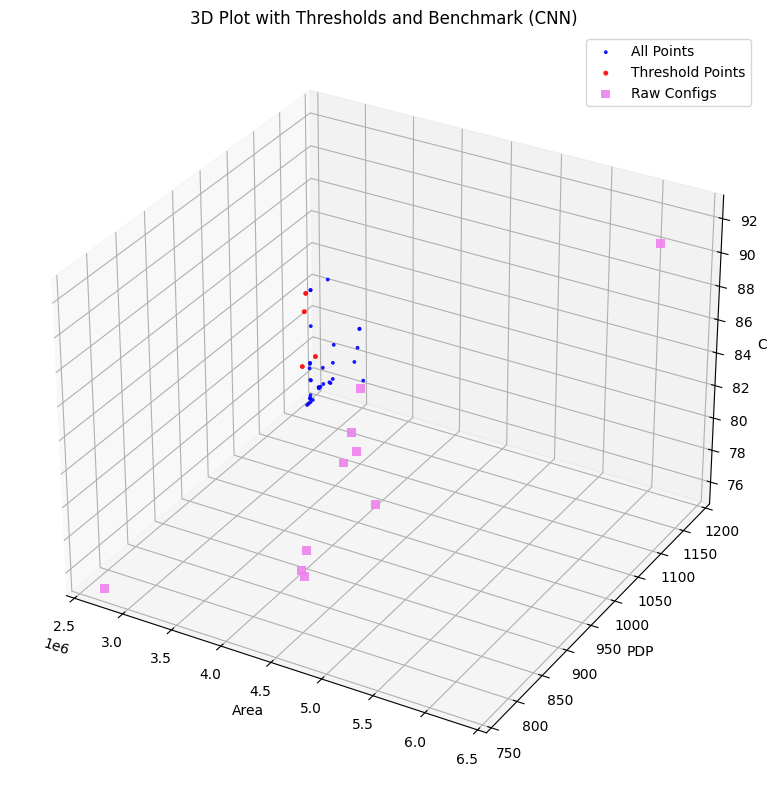

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ---------------- Configuration ----------------
pareto_files = [
    "Composite_plot_cnn/CSV_pareto_64.csv",
    "Composite_plot_cnn/CSV_pareto_128.csv",
    "Composite_plot_cnn/CSV_pareto_256.csv",
    "Composite_plot_cnn/CSV_pareto_512.csv"
]

raw_config_csv = "Composite_plot_cnn/raw_config_cnn.csv"
x_thresh = 4320000
y_thresh = 880
z_thresh = 89

area_range = (2500000, 6500000)
pdp_range = (750, 1200)
cnn_range = (75, 93)

# ---------------- Load and Combine ----------------
df_list = []
file_origin = []

for file in pareto_files:
    temp_df = pd.read_csv(file)
    temp_df["SourceFile"] = file  # Track which file it came from
    df_list.append(temp_df)

df = pd.concat(df_list, ignore_index=True)
raw_df = pd.read_csv(raw_config_csv)

# ---------------- Validation ----------------
required_columns = ['Area', 'PDP', 'CNN']
for data, name in [(df, "Pareto CSVs"), (raw_df, "Raw Config CSV")]:
    if not all(col in data.columns for col in required_columns):
        raise ValueError(f"{name} must contain columns: {required_columns}")

# ---------------- Threshold Evaluation ----------------
benchmark = raw_df.iloc[0]
print("\n✅ Benchmark Point:")
print(benchmark)

in_thresh = df[
    (df['Area'] <= x_thresh) &
    (df['PDP'] <= y_thresh) &
    (df['CNN'] >= z_thresh)
]

print("\n🔍 Threshold Points (Area <= {}, PDP <= {}, CNN >= {}):\n".format(
    x_thresh, y_thresh, z_thresh
))
print(in_thresh)

print("\n📈 Percentage Increase over Benchmark:")
for i, row in in_thresh.iterrows():
    area_inc = ((row['Area'] - benchmark['Area']) / benchmark['Area']) * 100
    pdp_inc = ((row['PDP'] - benchmark['PDP']) / benchmark['PDP']) * 100
    cnn_inc = ((row['CNN'] - benchmark['CNN']) / benchmark['CNN']) * 100
    print(f"• Point {i}: Area ↑ {area_inc:.2f}%, PDP ↑ {pdp_inc:.2f}%, CNN ↑ {cnn_inc:.2f}%")

# ---------------- Label Threshold in Main DF ----------------
df['Threshold'] = 0
df.loc[in_thresh.index, 'Threshold'] = 1

# ---------------- Save Updated CSVs (Overwrite Originals) ----------------
for file in pareto_files:
    df_file = df[df['SourceFile'] == file].drop(columns=['SourceFile'])
    df_file.to_csv(file, index=False)
    print(f"✅ Overwritten: {file} with 'Threshold' column")

# ---------------- Plot ----------------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

out_thresh = df[df['Threshold'] == 0]
ax.scatter(out_thresh['Area'], out_thresh['PDP'], out_thresh['CNN'],
           c='blue', marker='.', s=30, label='All Points', alpha=0.9, edgecolor='none')

if not in_thresh.empty:
    ax.scatter(in_thresh['Area'], in_thresh['PDP'], in_thresh['CNN'],
               c='red', marker='.', s=50, label='Threshold Points', alpha=0.9, edgecolor='none')

ax.scatter(raw_df['Area'], raw_df['PDP'], raw_df['CNN'],
           c='violet', marker='s', s=40, label='Raw Configs', alpha=0.9, edgecolor='none')

ax.set_xlim(area_range)
ax.set_ylim(pdp_range)
ax.set_zlim(cnn_range)

ax.set_xlabel('Area')
ax.set_ylabel('PDP')
ax.set_zlabel('CNN')
ax.set_title('3D Plot with Thresholds and Benchmark (CNN)')
ax.legend()
plt.tight_layout()
plt.show()
